# How to Predict if `Spotify` Customer Will Save a Song?

![](https://images.pexels.com/photos/340103/pexels-photo-340103.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260)

Photo by John Tekeridis from Pexels

## Problem Statement

Spotify is the number one music streaming platform in the world. Most of us listen to music daily on that platform. However, the amount of music selection could be overwhelming at the time. The purpose of this project is to `predict` if a random listener will save a song into his or her liked playlist. 

The data was taken from [kaggle](https://www.kaggle.com/geomack/spotifyclassification) where a listener playlist was scrapped using the Spotify API. We will employ pre-processing techniques such as `IQR` and `normalization` to prep the data and `cross validation` to train and evaluate the model. Subsequently, we will apply different statistical models such as `Logistic Regression`, `Decision Tree`, `Random Forest` to solve this `classification` problem. 

## Table of Content

1. EDA
2. Data Preprocessing 
3. Train, Validation and Test Technique
4. Train the Model
5. Improve the Model
6. Conclusion

In [1]:
dataset_url='https://www.kaggle.com/geomack/spotifyclassification'

In [1739]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\spotifyclassification" (use force=True to force download)


In [1740]:
#Install libraries
# !pip install pandas numpy matplotlib seaborn plotly -- quiet --upgrade

In [2]:
#Import the Libraries

#Dataframe and numerical library
import pandas as pd 
import numpy as np

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Machine Learming Model
from sklearn.linear_model import LogisticRegression 

<h3 style="color:#FF5733;background-color:#58D68D";>
    EDA (Exploratoray Data Analysis)
<br>
</h3>

In [3]:
path='./spotifyclassification/data.csv'

In [4]:
spotify_df=pd.read_csv(path)

In [5]:
spotify_df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [6]:
spotify_df.columns.tolist()
spotify_df=spotify_df[['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'song_title',
 'artist',
'target']]

## Columns

**Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.

**Danceability**: A Danceability measure from 0.0 to 1.0 describes how suitable a track is for dancing.

**Duration_ms**: The duration of the track in milliseconds.

**Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

**Instrumentalness**: It predicts whether a track contains no vocals. The closer the instrumentalness valye is to 1.0


**Key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. Eg. 0= C,1=C# etc..

**Liveness**: Detects the presence of an audience in the recording. A value above 0.8 provides strong likelihood that the track is live.

**Loudness**: The overall loudness of a track in decibels(dB)

**Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording, the closer to 1.0 the attribute value.

**Tempo**: The overall estimated tempo of a track in beats per minute (BPM)

**Time_signature** : An estimated overall time signature of a track.

**Valence** : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track

**Song_title**: The name of the song.

**Artist**: The singer of the song.

**Target**: The encoded value of 0 or 1 describes whether the listener will save the song or not.


In [7]:
#Drop the Unamed column
# spotify_df.drop(columns='Unnamed: 0', inplace=True)

In [8]:
n_rows=spotify_df.shape[0]
n_columns=spotify_df.shape[1]
print('The dataset contains {} rows and {} columns.'.format(n_rows,n_columns))

The dataset contains 2017 rows and 16 columns.


In [9]:
spotify_df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
song_title          0
artist              0
target              0
dtype: int64

In [10]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  song_title        2017 non-null   object 
 14  artist            2017 non-null   object 
 15  target            2017 non-null   int64  
dtypes: float64(10), int64(4), object(2)
memory

In [11]:
spotify_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


**Inferences**:
* The mean of acousticness, speechiness ,and the Q2(50% percentile) does not match up.We have some big jump between the min and Q1, Q3 and the max. We might have some outliers.
* In the danceability, energy column, we have a disparity between the min and Q1. We might also have some outliers.
* The time signature has the same value for Q1,Q2,Q3.
* The instrumentalness have a standard deviation bigger than its mean meaning most of the data points are not clustered around the mean. It also has the value 0 for the min and Q2

In [12]:
dist_cols=spotify_df.select_dtypes(include=['int64','float64']).columns.tolist()

In [13]:
dist_cols

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'target']

In [14]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(12,7)
# matplotlib.rcParams['figure.facecolor']='#00000000'

In [15]:
# fig,ax=plt.subplots(2,7,figsize=(150,30))
# j=0
# d=0
# part1=spotify_df[dist_cols].columns[0:7]
# part2=spotify_df[dist_cols].columns[7:14]

# for k in part2:
#     for i in part1:
#         if j<7:
#             ax[0,j].set_title(i)
#             sns.histplot(data=spotify_df,x=i,ax=ax[0,j])
#             j+=1
#     if d<7:
#         ax[1,d].set_title(k)
#         sns.histplot(data=spotify_df,x=k,ax=ax[1,d])
#         d+=1

In [16]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

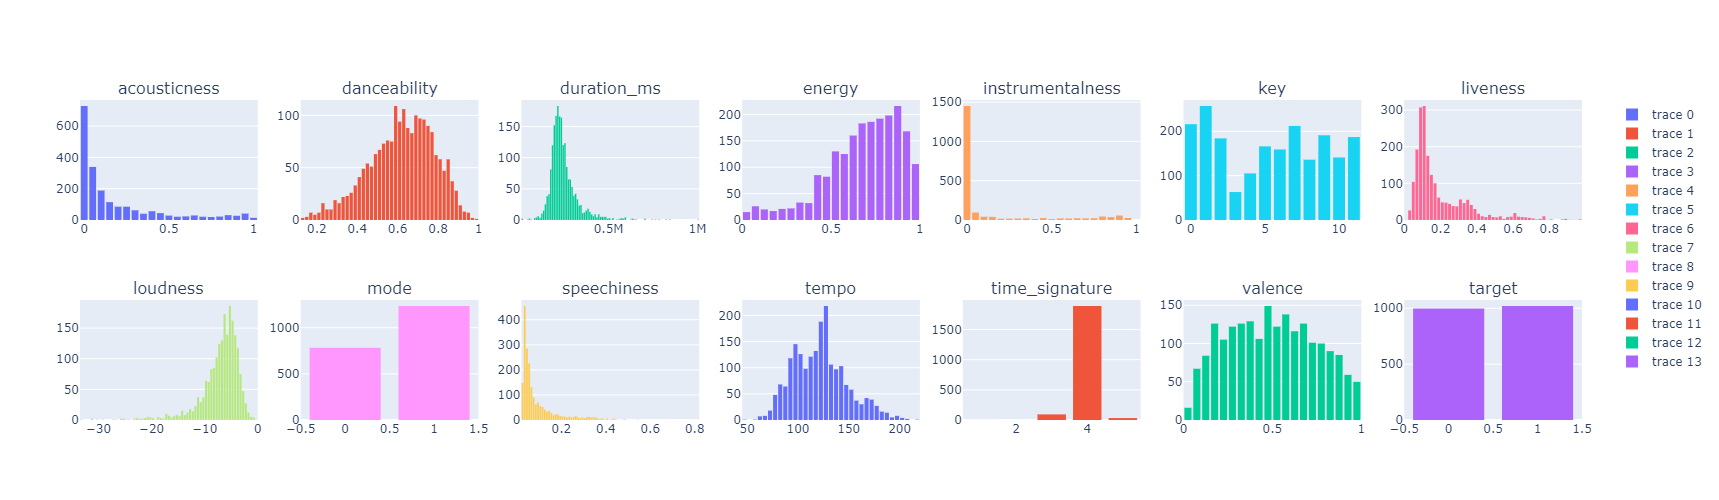

In [225]:

j=1
d=1

part1=spotify_df[dist_cols].columns[0:7]
part2=spotify_df[dist_cols].columns[7:14]


fig= make_subplots(rows=2, cols=7, start_cell ='top-left', subplot_titles=('acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness','loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'target'))


for k in part2:
    for i in part1:
        if j<8:
            fig.add_trace(go.Histogram(x=spotify_df[i]),row=1,col=j)
            j+=1
    if d<8:
        fig.add_trace(go.Histogram(x=spotify_df[k]),row=2,col=d)
        d+=1
fig.update_layout(bargap=.2,width=1100,height=500)
fig.show()

Our inferences by looking at the statistic data were mostly correct. We got a bunch of outliers in the acousticness, duration, energy, instrumentalness,liveness, loudness and speechiness.

We will try to remove some of those outliers. 




In [20]:
spotify_df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'song_title',
       'artist', 'target'],
      dtype='object')

An `outlier` is a rare and unlikely event that does not fit in some way.

The interquartile range method aka IQR is an useful statistic method to deal with non-gaussian distribution. The IQR is calculated as the difference between the 75th and 25th percentile. The IQR can be used to identify outliers by defining limits on samples. The k factor of the IQR is below the 25th percentile or above the 75th percentile.

The Z-score is another useful method to deal with outliers with a gaussian distribution. The Zscore is calculated with the standard deviation and by removing all data points that fall outside three standard deviations. Those data points are still part of it is an unlikely and rare event.

In [21]:
from numpy import percentile

In [22]:
def remove_outliers(df,name='feature'):
    #Store the 25th and 75th percentile 
    q25,q75=percentile(df[name],25),percentile(df[name],75)
    #Calculate the Interquartile range
    iqr_cut=1.5*(q75-q25)
    #Create variable of lower and upper cut
    lower,upper=q25-iqr_cut,q75+iqr_cut
    #Remove the outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df

    

In [23]:
def remove_outliers_gaussian(df,name='feature'):
    #calculate the mean and standard deviation
    mean,std=np.mean(df[name]),np.std(df[name])
    #create the cut variable
    std_cut= 3*std
    #create variable of lower and upper cut
    lower,upper=mean-std_cut,mean+std_cut
    #Remove outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df

In [24]:
spotify_df1=spotify_df.copy()
spotify_df1=remove_outliers(spotify_df1,'acousticness')
len(spotify_df1)

1823

In [25]:
# spotify_df1=remove_outliers_gaussian(spotify_df1,'danceability')

In [26]:
# dist_cols

In [27]:
# spotify_df=remove_outliers(spotify_df,dist_cols[1])

In [28]:
len(spotify_df1)

1823

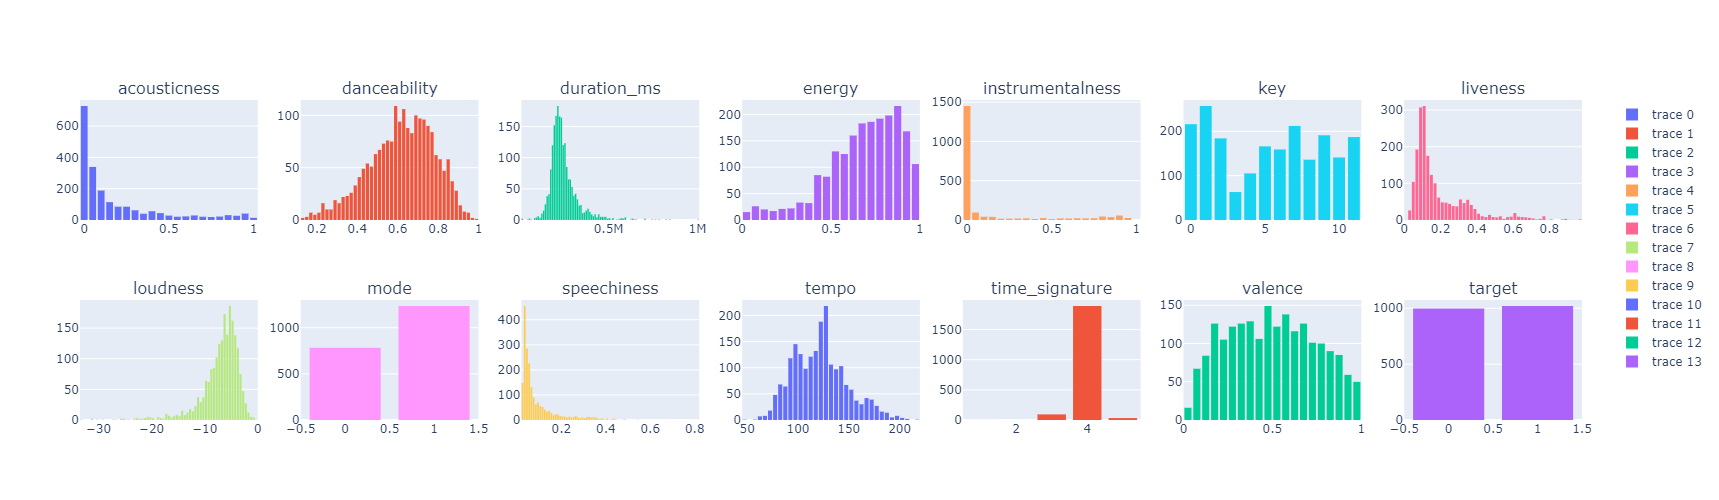

In [223]:

j=1
d=1

part1=spotify_df1[dist_cols].columns[0:7]
part2=spotify_df1[dist_cols].columns[7:14]


fig= make_subplots(rows=2, cols=7, start_cell ='top-left', subplot_titles=('acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness','loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'target'))


for k in part2:
    for i in part1:
        if j<8:
            fig.add_trace(go.Histogram(x=spotify_df[i]),row=1,col=j)
            j+=1
    if d<8:
        fig.add_trace(go.Histogram(x=spotify_df[k]),row=2,col=d)
        d+=1
fig.update_layout(bargap=.2,width=1100,height=500)
fig.show()

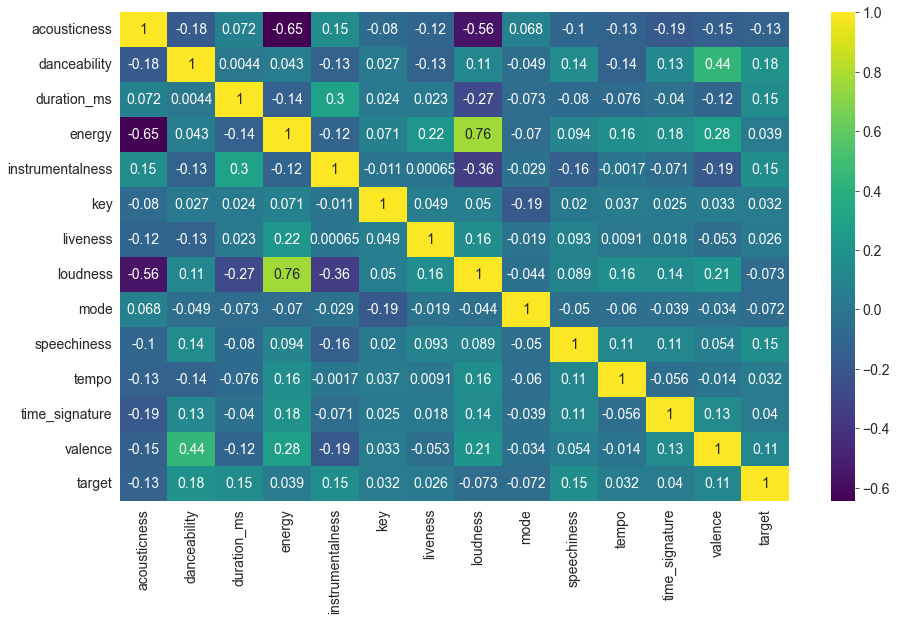

In [219]:
df_corr=spotify_df1.corr()
plt.figure(figsize=(15,9))
sns.heatmap(df_corr,annot=True,cmap='viridis');

Inferences:

Yellow means high correlation, Green means medium correlation and purple means negative correlation.

Our correlation matrix shows us almost no correlation with the target. The highest correlation with the target is low. The instrumentalness is about 0.23.

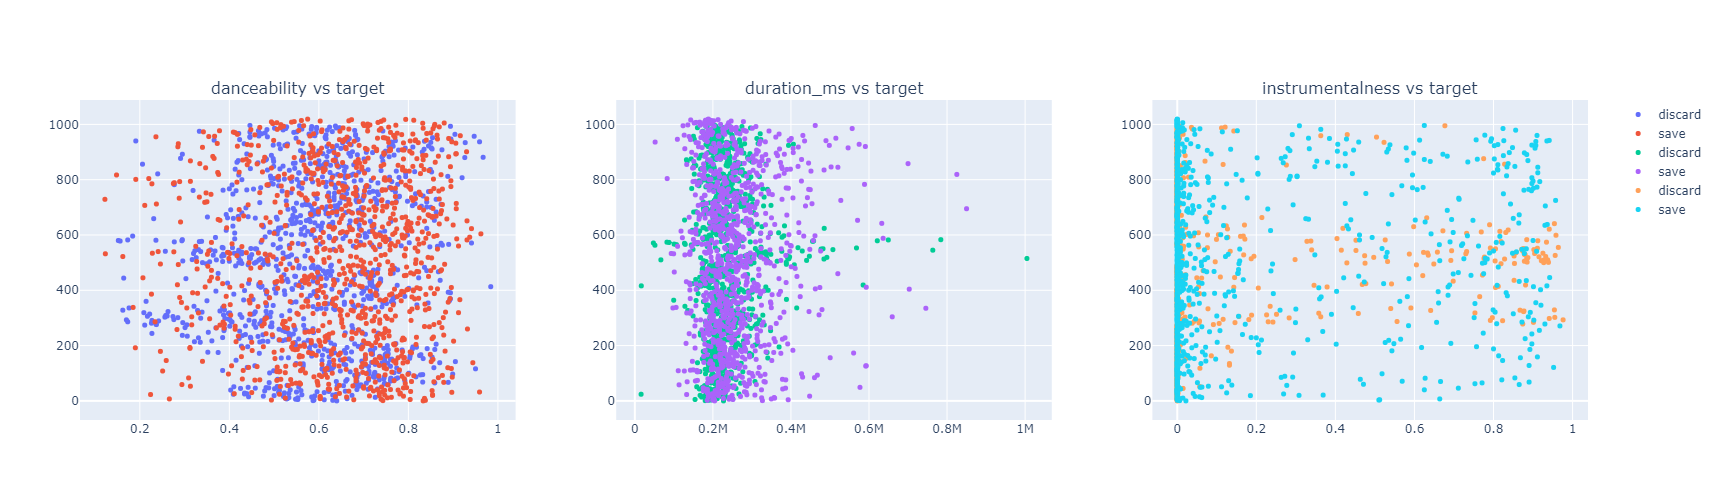

In [224]:

fig= make_subplots(rows=1, cols=3, start_cell ='top-left', subplot_titles=('danceability vs target', 'duration_ms vs target',
       'instrumentalness vs target'))


fig.add_trace(go.Scatter(x=spotify_df['danceability'][spotify_df['target']==0],mode='markers',marker_size=5,name='discard'),row=1,col=1)
fig.add_trace(go.Scatter(x=spotify_df['danceability'][spotify_df['target']==1],mode='markers',marker_size=5,name='save'),row=1,col=1)
fig.add_trace(go.Scatter(x=spotify_df['duration_ms'][spotify_df['target']==0],mode='markers',marker_size=5,name='discard'),row=1,col=2)
fig.add_trace(go.Scatter(x=spotify_df['duration_ms'][spotify_df['target']==1],mode='markers',marker_size=5,name='save'),row=1,col=2)
fig.add_trace(go.Scatter(x=spotify_df['instrumentalness'][spotify_df['target']==0],mode='markers',marker_size=5,name='discard'),row=1,col=3)
fig.add_trace(go.Scatter(x=spotify_df['instrumentalness'][spotify_df['target']==1],mode='markers',marker_size=5,name='save'),row=1,col=3)
       
fig.update_layout(width=1100,height=500)
fig.show()

In [79]:
# sns.pairplot(data=spotify_df,x_vars=['danceability','duration_ms','instrumentalness'],y_vars=['target'],height=7,aspect=.7)

* The song that the listener save lie between the range of 1min30s and 3min40s.However, there is more song that he dislikes in that range. If a song is in a range 4min to 8min he will more likely to save.
* if the danceability is in the range .5 to .9 the listener will save the song. It seems there are more song that it does not like when the danceability reach .8
* Most of the songs he likes and dislikes, the instrumentalness lie between 0 and 0.2. However, there is a trend, he saves more songs than he discards when the instrumentalness is between 0.2 to 1.


In [80]:
spotify_df.artist.nunique()
spotify_df.artist[spotify_df.target == 1].nunique()

653

The listener like 43% of the artist that he listens.

In [81]:
# pd.set_option('display.max_rows',20)

In [85]:
like=spotify_df[spotify_df.target == 1]
like.groupby('artist').sum()['target'].sort_values(ascending=False).head(20)

artist
Drake                     13
Disclosure                12
FIDLAR                     9
Crystal Castles            9
Kanye West                 8
CHVRCHES                   7
Young Thug                 7
Beach House                6
ASTR                       6
M83                        6
Hot Chip                   6
Future                     6
Grimes                     6
Tame Impala                5
The Partysquad             5
Purity Ring                5
Teams vs. Star Slinger     5
Duke Dumont                5
New Order                  5
ILoveMakonnen              5
Name: target, dtype: int64

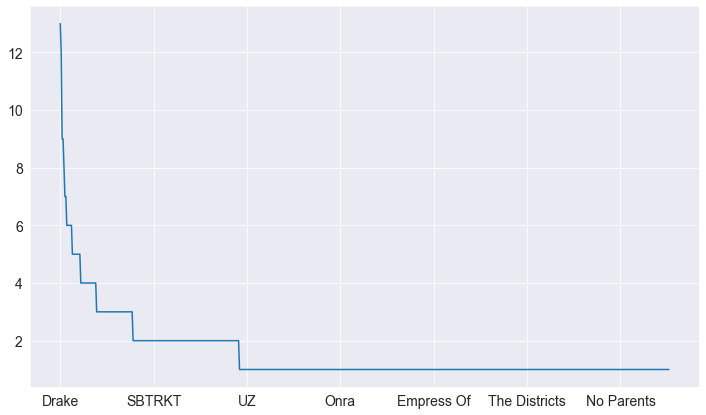

In [86]:
like.artist.value_counts().plot();

We could infer by the list of artist he saved the most that he likes rap, electronic music and alternative rock.

In [87]:
spotify_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist,target
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Mask Off,Future,1
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Redbone,Childish Gambino,1
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Xanny Family,Future,1
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Master Of None,Beach House,1
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Parallel Lines,Junior Boys,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,Like A Bitch - Kill The Noise Remix,Kill The Noise,0
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,Candy,Dillon Francis,0
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,Habit - Dack Janiels & Wenzday Remix,Rain Man,0
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,First Contact,Twin Moons,0


<h3 style="color:#FF5733;background-color:#58D68D";>
    Train Validation Test
<br>
</h3>

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
train_val_df,test_df=train_test_split(spotify_df1,test_size=0.2,random_state=2)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=2)

In [90]:
print('Train_df.shape:',train_df.shape)
print('Val_df.shape:',val_df.shape)
print('Test_df.shape',test_df.shape)

Train_df.shape: (1093, 16)
Val_df.shape: (365, 16)
Test_df.shape (365, 16)


## Identity the inputs and target

In [91]:
inputs_cols=spotify_df.columns.tolist()[:-1]
target_col='target'

In [92]:
print('inputs: {}'.format(inputs_cols))
print('target: {}'.format(target_col))

inputs: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'song_title', 'artist']
target: target


In [93]:
#Create train inputs and target
train_inputs=train_df[inputs_cols].copy()
train_target=train_df[target_col].copy()

#Create val inputs and target
val_inputs=val_df[inputs_cols].copy()
val_target=val_df[target_col].copy()

#Create test inputs and target
test_inputs=test_df[inputs_cols].copy()
test_target=test_df[target_col].copy()

In [94]:
train_inputs

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
491,0.013200,0.677,271480,0.860,0.011900,1,0.0487,-5.074,1,0.0348,121.989,4.0,0.7930,Don't Deny Your Heart,Hot Chip
698,0.005250,0.700,307467,0.675,0.000000,2,0.6570,-6.362,1,0.1490,124.882,4.0,0.2270,No New Friends - SFTB Remix,DJ Khaled
540,0.104000,0.241,194600,0.588,0.000420,7,0.0870,-6.914,1,0.0313,171.882,4.0,0.5060,Pictures Of Matchstick Men,Status Quo
1849,0.371000,0.814,268040,0.431,0.000000,8,0.3350,-9.125,1,0.0936,129.957,4.0,0.5460,My Little Secret,Xscape
2005,0.021600,0.526,216072,0.825,0.000001,5,0.4260,-3.506,0,0.0875,150.181,4.0,0.1080,Spoon Me - Slushii Remix,Elliphant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,0.302000,0.696,292987,0.521,0.000000,10,0.0565,-8.465,0,0.3320,100.000,4.0,0.4710,No Role Modelz,J. Cole
942,0.000017,0.499,395200,0.506,0.941000,9,0.0784,-16.778,0,0.1490,186.328,3.0,0.3670,Remember,Gino Soccio
1326,0.001250,0.217,255725,0.980,0.001390,5,0.2870,-3.332,1,0.1330,139.024,4.0,0.0658,Plagues,The End At The Beginning
1956,0.441000,0.762,193160,0.705,0.000000,4,0.1180,-5.082,1,0.0991,119.439,4.0,0.7760,Shaddap You Face,Joe Dolce


## Identify the numercial and categorical columns

In [95]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  song_title        2017 non-null   object 
 14  artist            2017 non-null   object 
 15  target            2017 non-null   int64  
dtypes: float64(10), int64(4), object(2)
memory

In [96]:
numerical_cols=train_inputs.select_dtypes(include=['float64','int64']).columns.tolist()
# numerical_cols.pop(8)
encoded_cols=['mode']
categorical_cols=train_inputs.select_dtypes(include=['object']).columns.tolist()

In [97]:
categorical_cols
# numerical_cols

['song_title', 'artist']

In [98]:
train_inputs[numerical_cols].describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,0.118758,0.630171,241087.675206,0.716446,0.102856,5.438243,0.195080,-6.418242,0.608417,0.095066,121.689742,3.986276,0.516843
std,0.154064,0.154949,71212.357197,0.168370,0.242131,3.659635,0.162326,2.705178,0.488328,0.092823,25.802387,0.224004,0.235189
min,0.000003,0.123000,52006.000000,0.118000,0.000000,0.000000,0.018800,-22.751000,0.000000,0.023100,64.992000,3.000000,0.035900
25%,0.007670,0.537000,200080.000000,0.593000,0.000000,2.000000,0.089800,-7.697000,0.000000,0.038400,100.338000,4.000000,0.325000
50%,0.045300,0.640000,226840.000000,0.737000,0.000029,6.000000,0.128000,-6.012000,1.000000,0.056300,121.999000,4.000000,0.516000
75%,0.172000,0.745000,263213.000000,0.857000,0.019700,9.000000,0.250000,-4.598000,1.000000,0.112000,135.965000,4.000000,0.704000
max,0.643000,0.950000,825027.000000,0.998000,0.976000,11.000000,0.969000,-0.935000,1.000000,0.816000,219.331000,5.000000,0.992000


<h3 style="color:#FF5733;background-color:#58D68D";>
    Preprocessing
<br>
</h3>

### Feature scaling

Data scaling is important because machine learning models learn from mapping the inputs to the outputs. If the inputs have different ranges and scales, the model will have difficulty while learning and will not perform well in a real case scenario. In our case, acousticness has a range of 0 to 0.99, a key has a range of 1 to 11 ,and a tempo from 47.85 to 219.33. The dataset range varies with features.

To solve this issue, we will use normalization.

Normalization is rescaling the range of original data so that it lies between 0 and 1.

y= x-min/max-min

Some of you will ask, why not use standardization. Standardization assumes that we have gaussian distribution meaning normal distribution. Most of features of our dataset have non-gaussian distribution as we could see thereof. We could still standardize but we may not have a desirable result.

>`Note`: The value of Acousticness, Danceability, Energy, Instrumentalness, Liveness, Speechiness ,and valence are small approximately 0 and the distribution is limited(standard division near 1). so it may not need data scaling. Mode columns is encoded, the value of 0 or 1, and do not need normalization, but the rest need it.

We normalize the numerical columns in the order they have a range between 0 and 1

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
# need_normalize_cols=['duration_ms','key','tempo','time_signature']

In [101]:
scaler=MinMaxScaler()

In [102]:
train_inputs[numerical_cols]=scaler.fit_transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=scaler.fit_transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=scaler.fit_transform(test_inputs[numerical_cols])

In [103]:
test_inputs[numerical_cols].describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.185078,0.595163,0.276697,0.679960,0.136602,0.470486,0.205015,0.682261,0.580822,0.151703,0.399794,0.493151,0.500981
std,0.234606,0.182219,0.104177,0.193458,0.278388,0.332413,0.181853,0.147151,0.494102,0.190196,0.202083,0.086648,0.252752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011080,0.478107,0.219370,0.581451,0.000000,0.090909,0.084055,0.607654,0.000000,0.029905,0.240422,0.500000,0.305123
50%,0.087019,0.617751,0.253859,0.699168,0.000080,0.545455,0.125580,0.703296,1.000000,0.072289,0.396913,0.500000,0.499517
75%,0.289053,0.714793,0.306267,0.824019,0.045026,0.727273,0.289926,0.783408,1.000000,0.171687,0.524177,0.500000,0.682096
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Label encoding

`Label encoding` converts each value of a column to a number. The new value is between 0 and n_categories-1

In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
encoder=LabelEncoder()

In [106]:
train_inputs['song_title']=encoder.fit_transform(train_inputs['song_title'])
val_inputs['song_title']=encoder.fit_transform(val_inputs['song_title'])
test_inputs['song_title']=encoder.fit_transform(test_inputs['song_title'])

train_inputs['artist']=encoder.fit_transform(train_inputs['artist'])
val_inputs['artist']=encoder.fit_transform(val_inputs['artist'])
test_inputs['artist']=encoder.fit_transform(test_inputs['artist'])

In [107]:
# train_inputs['artist']=encoder.fit_transform(train_inputs['artist'])
# val_inputs['artist']=encoder.fit_transform(val_inputs['artist'])
# test_inputs['artist']=encoder.fit_transform(test_inputs['artist'])

In [108]:
encoded_cols=['mode','song_title','artist']

In [109]:
train_inputs[categorical_cols]

,song_title,artist
491,226,330
698,633,188
540,692,652
1849,612,784
2005,839,245
...,...,...
1409,636,351
942,738,298
1326,695,689
1956,786,373


In [110]:
X_train=train_inputs[numerical_cols + encoded_cols]
X_val= val_inputs[numerical_cols + encoded_cols]
X_test=test_inputs[numerical_cols + encoded_cols]

In [111]:
X_val

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,mode,song_title,artist
1810,0.325612,0.564634,0.305430,0.525547,0.000003,0.000000,0.100275,0.412992,1.0,0.034509,0.240965,0.5,0.499035,1.0,355,70
1874,0.051072,0.626829,0.212072,0.691971,0.000016,0.636364,0.126603,0.735246,0.0,0.114710,0.298065,0.5,0.699635,0.0,149,191
849,0.040578,0.701220,0.330357,0.830657,0.420455,0.545455,0.027816,0.687208,0.0,0.106998,0.475039,0.5,0.879854,0.0,193,108
1251,0.016504,0.554878,0.256459,0.618978,0.000000,0.727273,0.174679,0.712016,1.0,0.033160,0.284247,0.5,0.506544,1.0,43,56
1669,0.055393,0.728049,0.253001,0.481752,0.000000,0.454545,0.081387,0.559047,0.0,0.058994,0.742831,0.5,0.963527,0.0,356,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,0.293204,0.746341,0.294735,0.289051,0.000000,0.818182,0.110577,0.669740,0.0,0.033160,0.269777,0.5,0.509762,0.0,268,138
983,0.212956,0.613415,0.316500,0.509489,0.007076,0.545455,0.662317,0.550980,1.0,0.100829,0.226287,0.5,0.348852,1.0,316,163
533,0.012553,0.289024,0.000000,0.967883,0.907025,0.000000,0.410485,0.882999,1.0,0.125892,0.662249,0.5,0.397125,1.0,215,89
888,0.737652,0.823171,0.176892,0.402920,0.002903,0.181818,0.023008,0.549281,1.0,0.250048,0.210821,0.5,0.921691,1.0,24,300


<h3 style="color:#FF5733;background-color:#58D68D";>
    Train the Model
<br>
</h3>

**Logistic Regression** is a supervised learning model which output is `binary`. It used the weight sum of the inputs variables into the sigmoid function and outputs a binary variable either 0 or 1

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [113]:
logistic_reg=LogisticRegression(solver='liblinear').fit(X_train,train_target)

In [114]:
train_preds=logistic_reg.predict(X_train)

In [115]:
accuracy_score(train_target,train_preds)

0.7081427264409881

In [116]:
val_preds=logistic_reg.predict(X_val)
accuracy_score(val_target,val_preds)

0.6958904109589041

As we sense earlier with the correlation matrix, the features have poor correlation with the target. So, `logistic regression` may not be the ideal model for the problem.

In [117]:
def predict_plot(inputs,target,name=''):
    preds=model.predict(inputs)
    acc=accuracy_score(target,preds)
    cf=confusion_matrix(target,preds)
    plt.figure()
    sns.heatmap(cf,annot=True)
    plt.xlabel('prediction')
    plt.ylabel('target')
    plt.title(name)
    print('Accuracy{:.2f}'.format(acc*100))

**Decision Tree** is a supervised learning model in which the data is continuously split based on a certain parameter.
The tree could be defined with two main parameters:

- Decision Nodes: where the decision is split 
- Leaves: the outcomes

In [118]:
#Store a copy of the dataset
spotify_df1=spotify_df.copy()
# remove outlier using Zcore
spotify_df1=remove_outliers_gaussian(spotify_df1,'danceability')
print('Size of dataset: ',len(spotify_df1))

# Create a train,val and test set
train_val_df,test_df=train_test_split(spotify_df1,test_size=0.2,random_state=2)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=2)

#Identify the inputs variables
inputs_cols=spotify_df.columns.tolist()[:-1]
target_col='target'

#Identify the numerical, categorical and encoded columns
numerical_cols=train_inputs.select_dtypes(include=['float64','int64']).columns.tolist()
encoded_cols=['mode']
categorical_cols=train_inputs.select_dtypes(include=['object']).columns.tolist()

#Create train inputs and target
train_inputs=train_df[inputs_cols].copy()
train_target=train_df[target_col].copy()

#Create val inputs and target
val_inputs=val_df[inputs_cols].copy()
val_target=val_df[target_col].copy()

#Create test inputs and target
test_inputs=test_df[inputs_cols].copy()
test_target=test_df[target_col].copy()

#Create X_train,X_val and X_test variable
X_train=train_inputs[numerical_cols + encoded_cols]
X_val= val_inputs[numerical_cols + encoded_cols]
X_test=test_inputs[numerical_cols + encoded_cols]



Size of dataset:  2015


Train Accuracy:100.00%
Validation Accuracy:70.72%


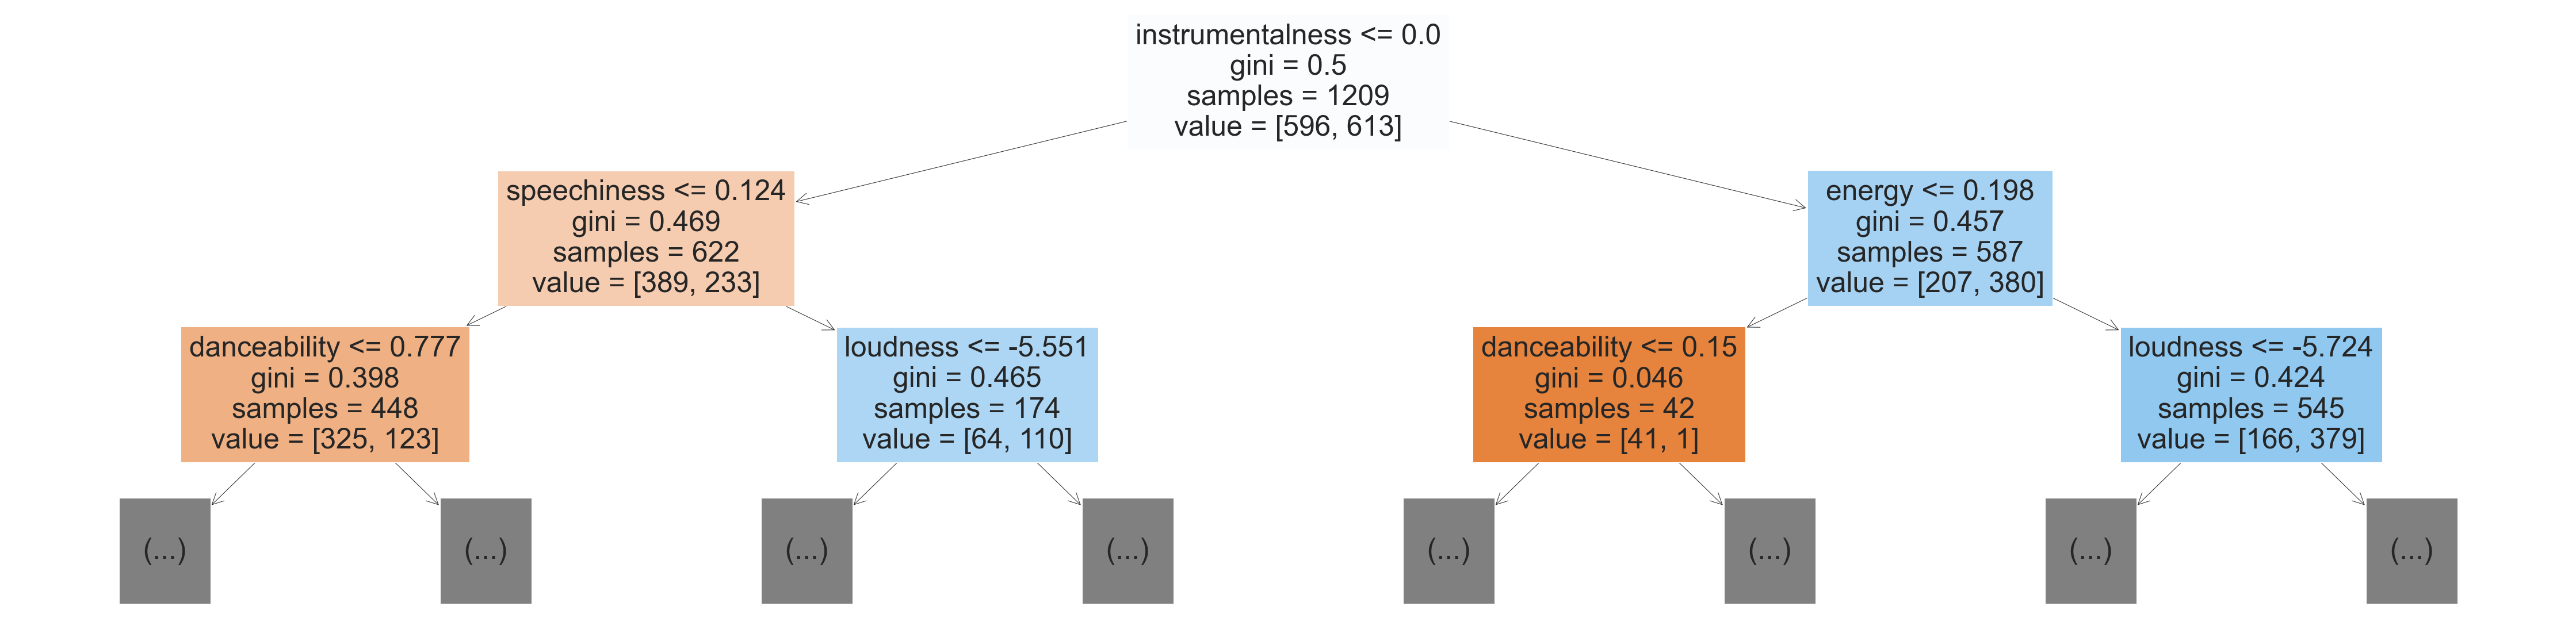

In [119]:
#Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Train the model
model = DecisionTreeClassifier(random_state=2).fit(X_train,train_target)

#Make prediction
train_preds=model.predict(X_train)

#Evaluate the train_inputs
train_acc=accuracy_score(train_target,train_preds)
print('Train Accuracy:{:.2f}%'.format(train_acc*100))
#Evaluate the val_inputs
val_preds=model.predict(X_val)
val_acc=accuracy_score(val_target,val_preds)
print('Validation Accuracy:{:.2f}%'.format(val_acc*100))

#Plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,max_depth=2,filled=True);

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
model = DecisionTreeClassifier(random_state=2)

In [122]:
%%time
model.fit(X_train,train_target)

Wall time: 16.9 ms


DecisionTreeClassifier(random_state=2)

In [123]:
train_preds=model.predict(X_train)

In [124]:
accuracy_score(train_target,train_preds)

1.0

In [125]:
val_preds=model.predict(X_val)
accuracy_score(val_target,val_preds)

0.707196029776675

In [126]:
from sklearn.tree import plot_tree, export_text

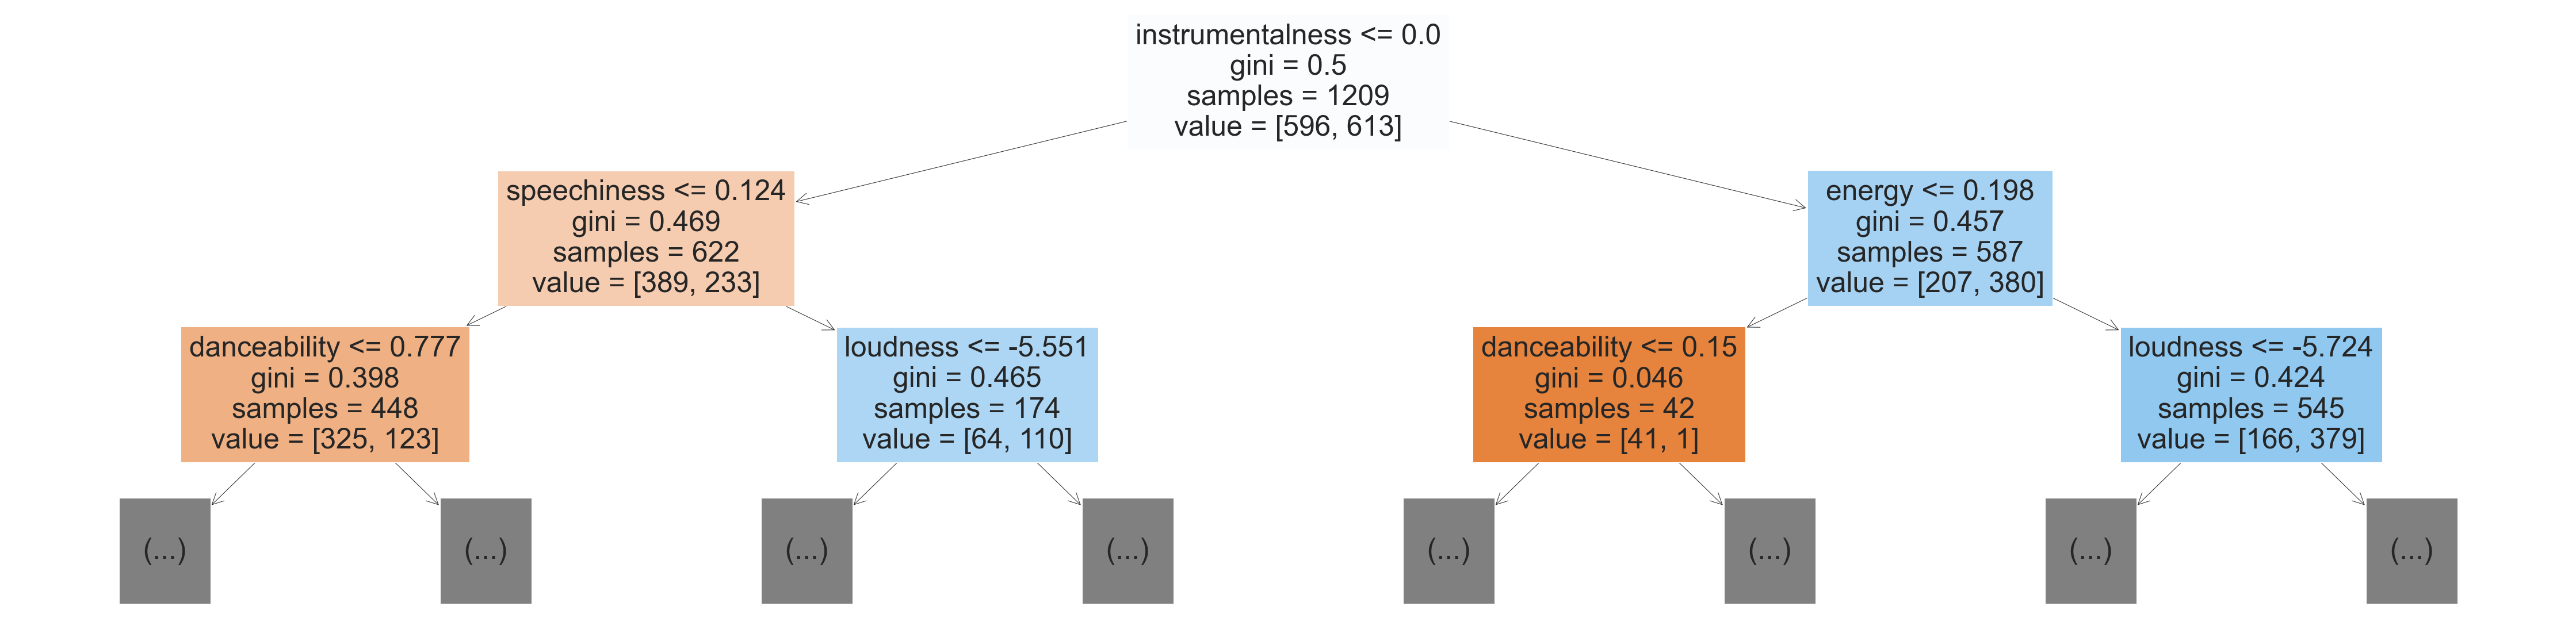

In [127]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,max_depth=2,filled=True);

In [128]:
model.tree_.max_depth

15

In [129]:
tree_text= export_text(model,max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- instrumentalness <= 0.00
|   |--- speechiness <= 0.12
|   |   |--- danceability <= 0.78
|   |   |   |--- duration_ms <= 163193.50
|   |   |   |   |--- energy <= 0.88
|   |   |   |   |   |--- speechiness <= 0.07
|   |   |   |   |   |   |--- energy <= 0.71
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- energy >  0.71
|   |   |   |   |   |   |   |--- duration_ms <= 158633.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- duration_ms >  158633.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- speechiness >  0.07
|   |   |   |   |   |   |--- speechiness <= 0.10
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- speechiness >  0.10
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- energy >  0.88
|   |   |   |   |   |--- class: 1
|   |   |   |--- duration_ms >  163193.50
|   |   |   |   |--- loudness <= -9.81
|   |   |   |   |   |--- valence <= 0.71
|   |   |   |   |   |   |--

In [130]:
model.feature_importances_

array([0.07245516, 0.1046646 , 0.09288968, 0.12564951, 0.13205953,
       0.03848565, 0.04626157, 0.11906112, 0.        , 0.10949882,
       0.05173017, 0.        , 0.08964498, 0.01759919])

In [131]:
importance_df= pd.DataFrame({
    'feature':X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance',ascending=False)

In [132]:
importance_df.head(10)

,feature,importance
4,instrumentalness,0.132060
3,energy,0.125650
7,loudness,0.119061
9,speechiness,0.109499
1,danceability,0.104665
2,duration_ms,0.092890
12,valence,0.089645
0,acousticness,0.072455
10,tempo,0.051730
6,liveness,0.046262


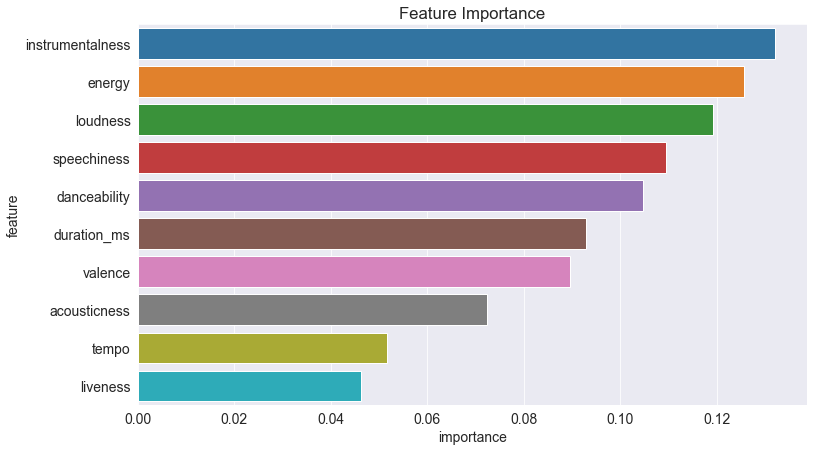

In [133]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance',y='feature');

In [134]:
model=DecisionTreeClassifier(max_depth=7, random_state=2)

In [135]:
model.fit(X_train, train_target)

DecisionTreeClassifier(max_depth=7, random_state=2)

In [136]:
model.score(X_train,train_target)

0.8502894954507858

In [137]:
model.score(X_val,val_target)

0.7295285359801489

<h3 style="color:#FF5733;background-color:#58D68D";>
    Improve The Model
<br>
</h3>

In [138]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=2)
    model.fit(X_train, train_target)
    train_acc = 1 - model.score(X_train, train_target)
    val_acc= 1 - model.score(X_val, val_target)
    
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}
    

In [139]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,16)])

Wall time: 300 ms


In [140]:
errors_df.sort_values('Validation Error',ascending=True).head(20)

,Max Depth,Training Error,Validation Error
8,9,0.081059,0.228288
7,8,0.114144,0.248139
5,6,0.181141,0.260546
9,10,0.047974,0.265509
4,5,0.219189,0.267990
6,7,0.149711,0.270471
1,2,0.292804,0.275434
3,4,0.239868,0.275434
13,14,0.002481,0.277916
10,11,0.026468,0.280397


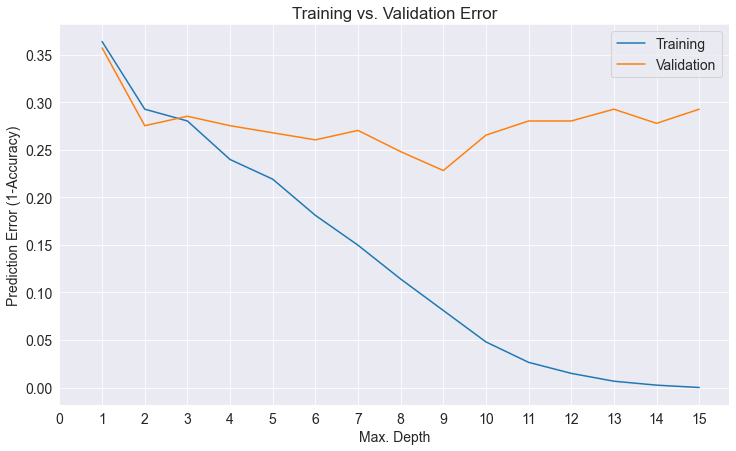

In [141]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,16))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1-Accuracy)')
plt.legend(['Training','Validation'])
plt.show()

In [142]:
model=DecisionTreeClassifier(max_depth=9, random_state=2).fit(X_train,train_target)
model.score(X_train,train_target)

0.9189412737799835

In [143]:
model.score(X_val,val_target)

0.771712158808933

In [144]:
model= DecisionTreeClassifier(max_leaf_nodes=50,random_state=3)

In [145]:
model.fit(X_train,train_target)

DecisionTreeClassifier(max_leaf_nodes=50, random_state=3)

In [146]:
model.score(X_train, train_target)

0.8511166253101737

In [147]:
model.score(X_val, val_target)

0.7320099255583127

In [148]:
model=DecisionTreeClassifier(max_depth=7,max_leaf_nodes=40).fit(X_train, train_target)
model.score(X_val, val_target)

0.7344913151364765

In [149]:
def max_leaf_error(ml):
    model = DecisionTreeClassifier(max_leaf_nodes=ml, random_state=3)
    model.fit(X_train, train_target)
    train_acc = 1 - model.score(X_train, train_target)
    val_acc= 1 - model.score(X_val, val_target)
    
    return {'Max Leaf': ml, 'Training Error': train_acc, 'Validation Error': val_acc}
    

In [150]:
%%time 
error_ml_df=pd.DataFrame([max_leaf_error(ml) for ml in range(2,128)])

Wall time: 3.34 s


In [151]:
error_ml_df.sort_values('Validation Error',ascending=True).head(20)

,Max Leaf,Training Error,Validation Error
67,69,0.111663,0.238213
62,64,0.124069,0.243176
65,67,0.118280,0.243176
64,66,0.120761,0.243176
63,65,0.122415,0.243176
66,68,0.114971,0.245658
68,70,0.108354,0.248139
72,74,0.102564,0.248139
61,63,0.126551,0.248139
73,75,0.102564,0.248139


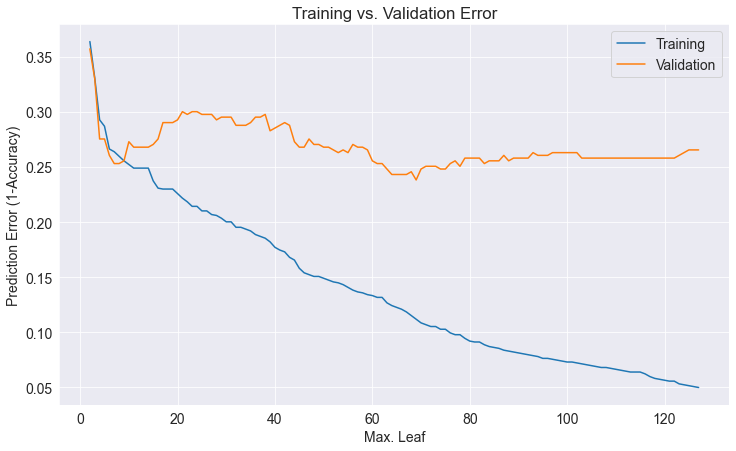

In [152]:
plt.figure()
plt.plot(error_ml_df['Max Leaf'], error_ml_df['Training Error'])
plt.plot(error_ml_df['Max Leaf'], error_ml_df['Validation Error'])
plt.title('Training vs. Validation Error')
# plt.xticks(range(2,128,8))
plt.xlabel('Max. Leaf')
plt.ylabel('Prediction Error (1-Accuracy)')
plt.legend(['Training','Validation'])
plt.show()

In [153]:
Model=DecisionTreeClassifier(max_depth=9,max_leaf_nodes=69,random_state=2).fit(X_train,train_target)
Model.score(X_val,val_target)

0.7543424317617866

<h3 style="color:#FF5733;background-color:#58D68D";>
    Train the Model
<br>
</h3>

**Random Forest** is a supervised learning model that use `ensemble learning` of many decision trees which output is based on the mean of outputs of thoses trees.

`Ensemble learning` is a technique that combines many classifiers to provide a solution.

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
model = RandomForestClassifier(n_jobs=-1, random_state=2).fit(X_train,train_target)

In [156]:
model.score(X_train,train_target)

1.0

In [157]:
model.score(X_val,val_target)

0.8213399503722084

In [158]:
importance_df= pd.DataFrame({
    'feature': X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [159]:
importance_df.head(10)

,feature,importance
4,instrumentalness,0.122886
7,loudness,0.121786
9,speechiness,0.098593
1,danceability,0.097695
0,acousticness,0.094738
3,energy,0.094117
2,duration_ms,0.087003
12,valence,0.082372
10,tempo,0.072200
6,liveness,0.066912


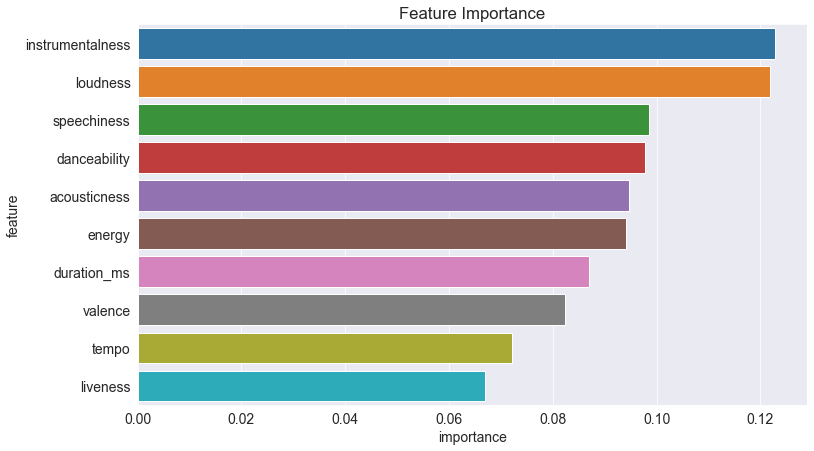

In [160]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature');

<h3 style="color:#FF5733;background-color:#58D68D";>
    Hyperparameter Tuning with Random Forest
<br>
</h3>


### `N_ESTIMATOR`

In [192]:
def n_estimator_error(n):
    model = RandomForestClassifier(n_jobs=-1,n_estimators=n, random_state=2)
    model.fit(X_train, train_target)
    train_acc = 1 - model.score(X_train, train_target)
    val_acc= 1 - model.score(X_val, val_target)
    
    return {'N_Estimator': n, 'Training Error': train_acc, 'Validation Error': val_acc}

In [193]:
n_errors=pd.DataFrame([n_estimator_error(n) for n in range(100,500)])

In [194]:
n_errors.sort_values('Validation Error',ascending=True)

,N_Estimator,Training Error,Validation Error
12,112,0.0,0.176179
0,100,0.0,0.178660
1,101,0.0,0.178660
2,102,0.0,0.178660
46,146,0.0,0.178660
...,...,...,...
102,202,0.0,0.196030
110,210,0.0,0.196030
29,129,0.0,0.196030
108,208,0.0,0.196030


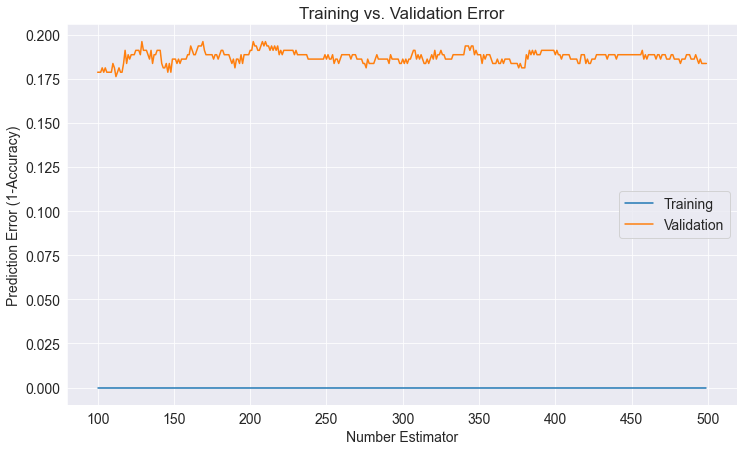

In [195]:
plt.figure()
plt.plot(n_errors['N_Estimator'], n_errors['Training Error'])
plt.plot(n_errors['N_Estimator'], n_errors['Validation Error'])
plt.title('Training vs. Validation Error')
# plt.xticks(range(2,128,8))
plt.xlabel('Number Estimator')
plt.ylabel('Prediction Error (1-Accuracy)')
plt.legend(['Training','Validation'])
plt.show()

In [196]:
model= RandomForestClassifier(n_jobs=-1,n_estimators=112,random_state=2).fit(X_train,train_target)
train_acc=model.score(X_train,train_target)
val_acc=model.score(X_val,val_target)
print('Train_accuracy:{:.2f}\nVal_accuracy:{:.2f}'.format(train_acc*100,val_acc*100))

Train_accuracy:100.00
Val_accuracy:82.38


## `Features`

In [197]:
def max_features(n):
    model = RandomForestClassifier(n_jobs=-1,max_features=n, random_state=2)
    model.fit(X_train, train_target)
    train_acc = 1 - model.score(X_train, train_target)
    val_acc= 1 - model.score(X_val, val_target)
    
    return {'Max Feature': n, 'Training Error': train_acc, 'Validation Error': val_acc}
    

In [198]:
feature_error=pd.DataFrame(max_features(n) for n in range(1,12))

In [199]:
feature_error.sort_values('Validation Error',ascending=True)

,Max Feature,Training Error,Validation Error
2,3,0.0,0.178660
1,2,0.0,0.181141
3,4,0.0,0.188586
4,5,0.0,0.196030
6,7,0.0,0.196030
5,6,0.0,0.200993
10,11,0.0,0.200993
8,9,0.0,0.203474
7,8,0.0,0.208437
9,10,0.0,0.208437


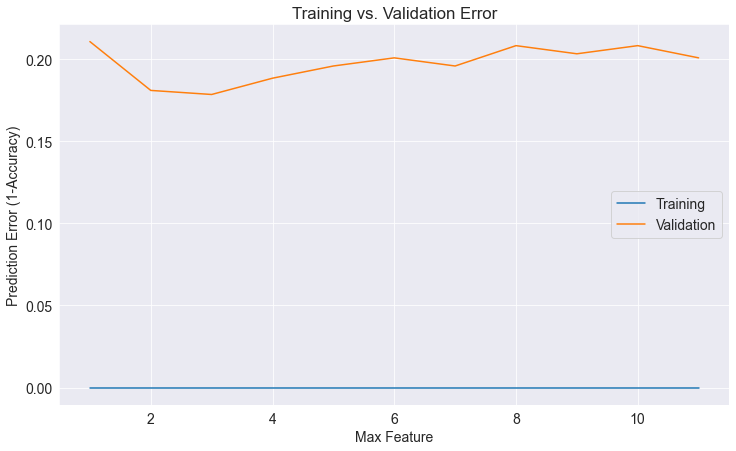

In [200]:
plt.figure()
plt.plot(feature_error['Max Feature'], feature_error['Training Error'])
plt.plot(feature_error['Max Feature'], feature_error['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xlabel('Max Feature')
plt.ylabel('Prediction Error (1-Accuracy)')
plt.legend(['Training','Validation'])
plt.show()

In [201]:
model= RandomForestClassifier(n_jobs=-1,max_features=3,random_state=2).fit(X_train,train_target)
train_acc=model.score(X_train,train_target)
val_acc=model.score(X_val,val_target)
preds=model.predict(X_val)
print('Train_accuracy:{:.2f}\nVal_accuracy:{:.2f}'.format(train_acc*100,val_acc*100))

Train_accuracy:100.00
Val_accuracy:82.13


## `Max_Depth`

In [202]:
def max_depth_error(n):
    model=RandomForestClassifier(n_jobs=-1,max_depth=n,random_state=2).fit(X_train,train_target)
    train_acc=1 - model.score(X_train,train_target)
    val_acc=1 - model.score(X_val,val_target)
    return {'Max Depth': n,'Training Error': train_acc,'Validation Error': val_acc}

In [203]:
md_error=pd.DataFrame([max_depth_error(n) for n in range(1,25)])

In [204]:
md_error.sort_values('Validation Error', ascending=True)

,Max Depth,Training Error,Validation Error
15,16,0.000000,0.173697
18,19,0.000000,0.173697
23,24,0.000000,0.178660
21,22,0.000000,0.178660
22,23,0.000000,0.178660
9,10,0.012407,0.181141
16,17,0.000000,0.181141
17,18,0.000000,0.181141
19,20,0.000000,0.181141
20,21,0.000000,0.181141


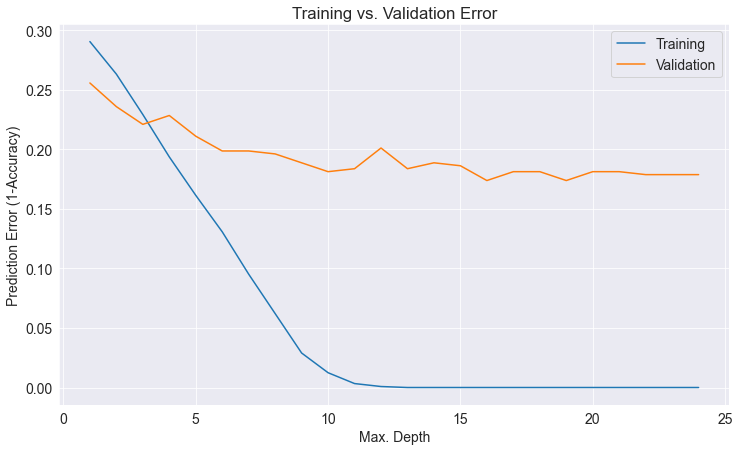

In [205]:
plt.figure()
plt.plot(md_error['Max Depth'], md_error['Training Error'])
plt.plot(md_error['Max Depth'], md_error['Validation Error'])
plt.title('Training vs. Validation Error')
# plt.xticks(range(2,128,8))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1-Accuracy)')
plt.legend(['Training','Validation'])
plt.show()

In [206]:
model=RandomForestClassifier(n_jobs=-1,n_estimators=112,max_features=3,max_depth=16,random_state=2).fit(X_train,train_target)
model.score(X_val,val_target)

0.8287841191066998

In [207]:
model.score(X_test,test_target)


0.7841191066997518

The model accuracy is 82% on the Val test and 78% on the test set. It may infer that our model generalizes a bit well well on data it has not seen before. 
Let's push our evaluation by creating a `dumb` model.

We will create three models: one that guesses randomly, another that always save the song by returning '1', and a final one that always discards a song by returning '0'.

In [208]:
# Create a model that guess randomly
def random_guess(inputs):
    return np.random.choice([0,1], len(inputs))
#Create a model that always save the song
def all_save(inputs):
    return np.full(len(inputs), 1)
# Create a model that discard all song
def all_discard(inputs):
    return np.full(len(inputs), 0)

In [209]:
guess=accuracy_score(test_target,random_guess(X_test))
save=accuracy_score(test_target, all_save(X_test))
discard=accuracy_score(test_target,all_discard(X_test))
print('Accuracy Random Guess: {:.2f}%\nAccuracy All Save: {:.2f}%\nAccuracy All Discard: {:.2f}%'.format(guess*100,save*100,discard*100))

Accuracy Random Guess: 47.89%
Accuracy All Save: 47.64%
Accuracy All Discard: 52.36%


The `dumb` model all perform poorly compared to our`Random Forest` model. 

## Prediction on Single Input

In [210]:
# spotify_df.iloc[2000,:]

In [211]:
new_song={'acousticness':0.0301,
          'danceability':0.583,
           'duration_ms':224092,
           'energy':0.891,
           'instrumentalness':0.000003,
           'key':7,
           'liveness':0.129,
           'loudness':-3.495,
           'mode':1,
           'speechiness':0.447,
           'tempo':149.843,
           'time_signature':4.0,
           'valence':0.321,
           'song_title':'Without U',
           'artist':'Steve Aoki'}

In [212]:
def predict_song(new_song):
    song_df=pd.DataFrame([new_song])
    X_song=song_df[numerical_cols+ encoded_cols]
    pred=model.predict(X_song)[0]
    prob=model.predict_proba(X_song)[0][list(model.classes_).index(pred)]
    if pred == 0:
        return 'Discard', prob
    elif pred == 1:
        return 'Save', prob

In [213]:
predict_song(new_song)

('Discard', 0.8718112244897959)

In [214]:
import joblib

In [215]:
spotify_predict={
    'model':model,
    'inputs_cols':inputs_cols,
    'target_col':target_col,
    'numerical_cols':numerical_cols,
    'categorical_cols':categorical_cols,
    'encoded_cols':encoded_cols
}

In [216]:
joblib.dump(spotify_predict,'spotify_predict.joblib')

['spotify_predict.joblib']

In [217]:
spotify_predict1=joblib.load('spotify_predict.joblib')

In [218]:
test_pred=spotify_predict1['model'].predict(X_test)
accuracy_score(test_target,test_pred)

0.7841191066997518

<h3 style="color:#FF5733;background-color:#58D68D";>
    Conclusion
<br>
</h3>


- EDA is a crucial step to formulate a model that can generalize well.

- The distribution and the range of a dataset could be transformed by using a technique like normalization and IQR to improve our model.

- Logistic Regression is reliant on correlation and linearity between the inputs and outputs to perform well.

- Train, Validation and Test is a useful technique to evaluate the model however it could be strenuous to implement.

- Random Forest is a powerful model that can elevate the prediction of the model.

- Tuning the parameter can improve a model.

## References

`coursera`: https://www.coursera.org/learn/machine-learning

`jovian`: https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms

`kaggle`: https://www.kaggle.com/geomack/spotifyclassification